<a href="https://colab.research.google.com/github/gitvanya34/SortifyScan/blob/main/UltralyticsExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка

In [ ]:
FLAG_COLAB = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if FLAG_COLAB:
  !pip install ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 kB 15.5 MB/s eta 0:00:00


##Проверка моделей model_info

In [ ]:
import torch

# Загружаем файл модели
model_path = '/content/drive/MyDrive/yolov8l.pt upgrade 5 эпох/runs2/detect/train5/weights/best.pt'
model = torch.load(model_path)

# Выводим информацию о загруженной модели
model_info = {
    "model_type": type(model),
    "keys": list(model.keys()),
    "epoch": (model.get('epoch'))
}

model_info
model


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/yolov8l.pt upgrade 5 эпох/runs2/detect/train5/weights/best.pt'

# YOLO

## Обучение

In [ ]:
# !export PYTORCH_CUDA_ALLOC_CONF="max_split_size_mb=10"

In [ ]:
from ultralytics import YOLO

# Load a model
# path_data = '/content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/data.yaml'
path_data = '/content/drive/MyDrive/datasetsYolo8/SAM auto_annotate/data-seg.yaml'

model = YOLO('yolov8l-seg.pt')
results = model.train(data = path_data,\
                      epochs = 5,\
                      # batch = 4\
                      )



Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/datasetsYolo8/SAM auto_annotate/data-seg.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/train/labels.cache... 2608 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2608/2608 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/labels.cache... 198 images, 0 backgrounds, 0 corrupt: 100%|██████████| 198/198 [00:00<?, ?it/s]


Plotting labels to runs/segment/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/163 [00:00<?, ?it/s]


TypeError: ERROR ❌ segment dataset incorrectly formatted or not a segment dataset.
This error can occur when incorrectly training a 'segment' model on a 'detect' dataset, i.e. 'yolo train model=yolov8n-seg.pt data=coco8.yaml'.
Verify your dataset is a correctly formatted 'segment' dataset using 'data=coco8-seg.yaml' as an example.
See https://docs.ultralytics.com/datasets/segment/ for help.

## логи

```
15 epochs completed in 0.624 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.36s/it]
                   all        198        433      0.925      0.859       0.94      0.751
               package        198        433      0.925      0.859       0.94      0.751
Speed: 0.7ms preprocess, 16.8ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train
```

sibal
```
Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                   all        379         60      0.915      0.867      0.941      0.851
Speed: 0.5ms preprocess, 17.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train2
```
```
Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]
                   all        198        433      0.878      0.848      0.907      0.692
Speed: 0.3ms preprocess, 17.3ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train
```
```
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]
                   all        198        433      0.886      0.818        0.9      0.672
Speed: 0.6ms preprocess, 18.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train
```

```

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]
                   all        198        433      0.901       0.86      0.927        0.7
Speed: 0.7ms preprocess, 3.5ms inference, 0.0ms loss, 4.3ms postprocess per image
```

```
lytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]
                   all        151        414      0.664      0.503      0.554      0.335
                 label        151        129      0.613      0.395      0.492      0.279
               package        151        285      0.715      0.611      0.616      0.392
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to runs/detect/train2
```

```
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/labels.cache... 198 images, 0 backgrounds, 0 corrupt: 100%|██████████| 198/198 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13
                  [00:09<00:00,  1.41it/s]
                   all        198        433      0.911       0.87      0.932      0.721
Speed: 6.6ms preprocess, 7.7ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/detect/val2
```

```
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]
                   all        151        414      0.623       0.47      0.522      0.317
                 label        151        129      0.538      0.415      0.449      0.265
               package        151        285      0.708      0.526      0.595       0.37
Speed: 0.4ms preprocess, 3.3ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train4
```


## Ввести path на новейшие веса

In [ ]:
path_weights = '/content/drive/MyDrive/yolov8l.pt 2.0 /runs4 best 0.751 /detect/train4/weights/best.pt'

## Валидация

In [ ]:
model = YOLO(path_weights)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/MyDrive/datasetsYolo8/Package_and_label_detector.v3i.yolov8/valid/labels.cache... 151 images, 3 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 313, len(boxes) = 414. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


                   all        151        414      0.481      0.503      0.444      0.256
                 label        151        129      0.459      0.494      0.414      0.228
               package        151        285      0.502      0.512      0.474      0.285
Speed: 0.3ms preprocess, 43.0ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val


array([    0.22793,     0.28499])

 ## Детекция

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO(path_weights)  # load an official model
# model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model

# model(source="/content/drive/MyDrive/video/1.mp4", save = True)
# model(source="/content/drive/MyDrive/video/2.mp4", save = True)
# model(source="/content/drive/MyDrive/video/3.mp4", save = True)
# model(source="/content/drive/MyDrive/video/4.mp4", save = True)
# model(source="/content/drive/MyDrive/video/5.mp4", save = True)
# model(source = '/content/drive/MyDrive/video/4.mp4', save = True)
begin_img_path = "/content/drive/MyDrive/images/render2.png"
result = model.predict(source=begin_img_path,\
      save = True, \
      # retina_masks=True,\
      # augment=True,\
      # visualize=True,\
      conf= 0.5,\
      save_frames = True,\
      # save_txt = True,\
      # save_conf = True,
       )

# source = ['/content/drive/MyDrive/images/exp.jpg',\
          # '/content/drive/MyDrive/images/exp2.jpg',\
          # '/content/drive/MyDrive/images/exp3.jpg',\
          # '/content/drive/MyDrive/images/exp4.jpg'],\


image 1/1 /content/drive/MyDrive/images/render2.png: 640x640 1 package, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 544.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


runs/detect/predict6


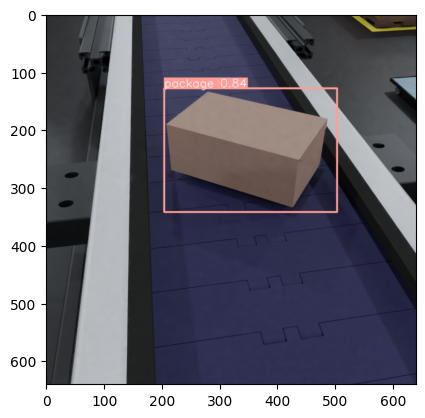

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
print(result[0].save_dir)
image = Image.open(result[0].save_dir + '/' +result[0].path.split('/')[-1])
plt.imshow(image)
plt.show()

In [ ]:
for r in result:
    print(r.tojson())
    j = r.tojson()


import json
j = json.dumps(j)
print(j)
j = json.loads(j)
box = json.loads(j)[0]['box']
print(list(box.values()))
print(box['x1'],box['y1'])
print(box['x2'],box['y2'])


[
  {
    "name": "package",
    "class": 1,
    "confidence": 0.8446019887924194,
    "box": {
      "x1": 204.6577911376953,
      "y1": 128.74923706054688,
      "x2": 503.93438720703125,
      "y2": 342.52130126953125
    }
  }
]
"[\n  {\n    \"name\": \"package\",\n    \"class\": 1,\n    \"confidence\": 0.8446019887924194,\n    \"box\": {\n      \"x1\": 204.6577911376953,\n      \"y1\": 128.74923706054688,\n      \"x2\": 503.93438720703125,\n      \"y2\": 342.52130126953125\n    }\n  }\n]"
[204.6577911376953, 128.74923706054688, 503.93438720703125, 342.52130126953125]
204.6577911376953 128.74923706054688
503.93438720703125 342.52130126953125


## Экспорт

In [ ]:
model = YOLO(path_weights)  # load a custom trained model

# Export the model
model.export()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8x summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (130.4 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 18.7s, saved as '/content/runs/detect/train/weights/best.torchscript' (260.5 MB)

Export complete (28.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/datasetsYolo8/Package_and_label_detector.v3i.yolov8/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.torchscript'

# SAM

In [ ]:
from ultralytics import SAM
from google.colab.patches import cv2_imshow


# Load a model
model = SAM('sam_l.pt')

# Display model information (optional)
model.info()
path = '/content/drive/MyDrive/images/'
# array_source = [path + 'exp.jpg', path + 'exp2.jpg', path + 'exp3.jpg', path + 'exp4.jpg']
# Run inference
result = model(source = '/content/untitled.png',\
      # classes=[0],\
      save = True,\
       labels=[1],\
        conf= 0.25,\
      # segment_all = False,\
      save_crop  = True\
      )
print(str(result))


 12%|█▏        | 148M/1.16G [00:04<00:30, 35.9MB/s]


KeyboardInterrupt: 

In [ ]:

overrides = dict(conf=0.99,  task='segment', mode='predict',  model="sam_b.pt")
predictor = SAMPredictor(overrides=overrides)
predictor.set_image(result[0].orig_img)
bboxes = list(box.values())
result = predictor(bboxes = bboxes)



Ultralytics YOLOv8.1.23 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

0: 1024x1024 31.6ms
Speed: 0.0ms preprocess, 31.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict8


runs/segment/predict8


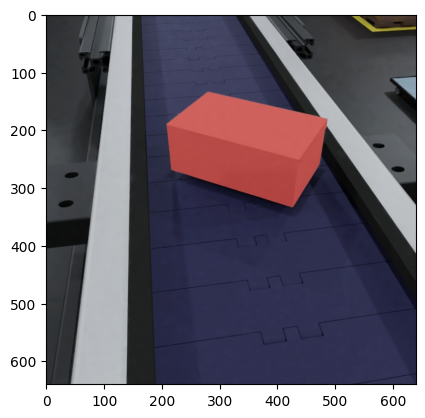

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
print(result[0].save_dir)
image = Image.open(result[0].save_dir + '/' +result[0].path.split('/')[-1])
plt.imshow(image)
plt.show()

In [ ]:
import numpy as np
for r in result:
  print(r.masks)
  maskxy = r.masks.xy[0]

x = np.array(maskxy)[:,1]
y = np.array(maskxy)[:,0]

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')
orig_shape: (640, 640)
shape: torch.Size([1, 640, 640])
xy: [array([[        279,         135],
       [        278,         136],
       [        277,         136],
       [        273,         140],
       [        272,         140],
       [        269,         143],
       [        268,         143],
       [        264,         147],
       [        263,         147],
       [        260,         150],
       [        259,         150],
       [        256,         153],
       [        255,         153],
       [        251,         157]

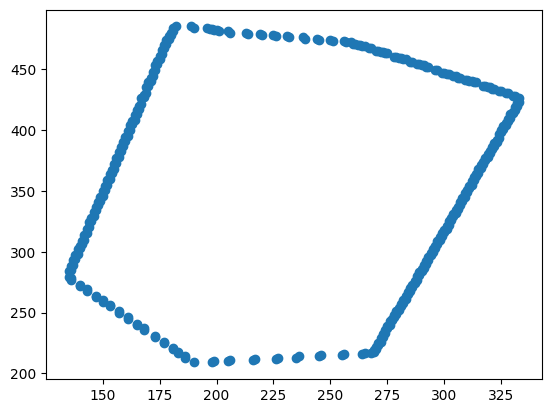

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.scatter(x,y)
plt.show()


### Вырезать объект
https://docs.ultralytics.com/ru/guides/isolating-segmentation-objects/#recipe-walk-through

In [ ]:
from pathlib import Path

import cv2 as cv
import numpy as np
from ultralytics import YOLO

In [ ]:
for r in result:
    img = np.copy(r.orig_img)
    # img_name = Path(r.path).stem # source image base-name

    # Iterate each object contour (multiple detections)
    for ci,c in enumerate(r):
        #  Get detection class name
        print (c)
        # label = c.names[c.boxes.cls.tolist().pop()]


ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0'}
obb: None
orig_img: array([[[48, 47, 46],
        [48, 47, 46],
        [49, 48, 47],
        ...,
        [53, 62, 79],
        [52, 62, 79],
        [52, 62, 79]],

       [[49, 47, 46],
        [49, 47, 46],
        [49, 48, 47],
        ...,
        [52, 61, 77],
        [51, 60, 77],
        [51, 61, 78]],

       [[50, 48, 47],
        [50, 48, 47],
        [50, 48, 47],
        ...,
        [51, 60, 77],
        [51, 60, 77],
        [50, 59, 76]],

       ...,

       [[51, 48, 46],
        [51, 49, 46],
        [50, 48, 45],
        ...,
        [77, 45, 44],
        [75, 42, 41],
        [74, 42, 41]],

       [[52, 50, 47],
        [51, 48, 46],
        [51, 49, 46],
        ...,
        [79, 46, 44],
        [76, 44, 43],
        [74, 41, 40]],

       [[51, 49, 47],
        [51, 49, 47],
        [51, 49, 47],
        ...,
  

In [ ]:
b_mask = np.zeros(img.shape[:2], np.uint8)

#  Extract contour result
contour = c.masks.xy.pop()
#  Changing the type
contour = contour.astype(np.int32)
#  Reshaping
contour = contour.reshape(-1, 1, 2)




In [ ]:
# Draw contour onto mask
_ = cv.drawContours(b_mask,
                    [contour],
                    -1,
                    (255, 255, 255),
                    cv.FILLED)

# Create 3-channel mask
mask3ch = cv.cvtColor(b_mask, cv.COLOR_GRAY2BGR)

# Isolate object with binary mask
isolated = cv.bitwise_and(mask3ch, img)

# OPTION-2: Isolate object with transparent background (when saved as PNG)
# isolated = np.dstack([img, b_mask])

# данные ббокса
bbx1, bby1, bbx2, bby2 = int(bboxes[0]), int(bboxes[1]), int(bboxes[2]), int(bboxes[3])
iso_crop = isolated[bby1:bby2, bbx1:bbx2]
_ = cv.imwrite(f'еуые.png', iso_crop)

In [ ]:
# Очистка памями гпу
# !pip install numba

# from numba import cuda
# device = cuda.get_current_device()
# device.reset()

In [ ]:
from ultralytics.models.sam import Predictor as SAMPredictor

overrides = dict(conf=0.99, task='segment', mode='predict',  model="sam_b.pt", save_crop  = True)
predictor = SAMPredictor(overrides=overrides)
predictor.set_image(iso_crop)
result = predictor()

Ultralytics YOLOv8.1.23 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


RuntimeError: CUDA error: invalid argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


runs/segment/predict6


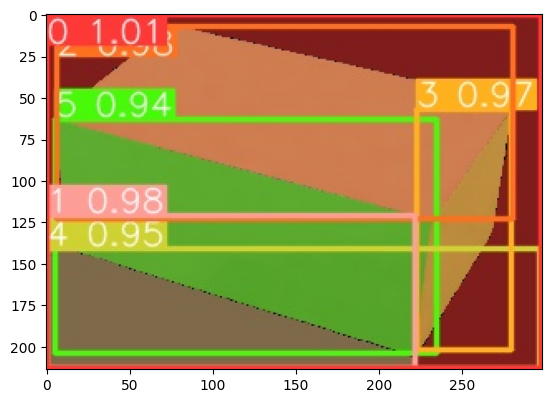

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
print(result[0].save_dir)
image = Image.open(result[0].save_dir + '/' +result[0].path.split('/')[-1])
plt.imshow(image)
plt.show()
# пропускаем нулевый объект так как это все вместе

In [ ]:
import numpy as np
for r in result:
  print(len(r.masks.xy[0]))
  print(len(r.masks.xy[1]))
  print(len(r.masks.xy[2]))
  print(len(r.masks.xy[3]))
  maskxy = r.masks.xy[1]
#  разобраться с лишней сегментацией
x1, y1 = bbx1 + np.array(r.masks.xy[5])[:,0],-(np.array(r.masks.xy[5])[:,1] + bby1)
x2, y2 = bbx1 + np.array(r.masks.xy[2])[:,0],-(np.array(r.masks.xy[2])[:,1] + bby1)
x3, y3 = bbx1 + np.array(r.masks.xy[3])[:,0],-(np.array(r.masks.xy[3])[:,1] + bby1)
print(x1,y1)
print(x2,y2)
print(len(x2),len(y2))
print(len(x3),len(y3))

19
156
299
143
[        210         209         209         210         210         211         211         212         212         213         213         214         214         215         215         216         216         217         217         220         223         224         225         226         230         231
         232         233         237         238         240         241         243         244         245         246         248         249         252         253         255         256         257         258         261         262         264         265         268         269         270         271
         274         275         277         278         280         281         284         285         286         287         290         291         292         293         297         298         300         301         302         303         306         307         309         310         314         315
         316         317         318         3

In [ ]:
import numpy as np

In [ ]:
arr = [np.array([[1,0],[0,1],[0,298],[1,299],[4,299],[5,298],[6,299],[7,298],[8,298],[9,299],[10,298],[13,298],[14,299],[15,298],[17,298],[18,299],[19,299],[20,298],[23,298],[24,299],[25,298],[62,298],[63,299],[64,298],[77,298],[78,299],[79,298],[82,298],[83,299],[84,298],[87,298],[88,299],[89,298],[92,298],[93,299],[94,298],[96,298],[97,299],[98,299],[99,298],[101,298],[102,299],[103,299],[104,298],[107,298],[108,299],[109,298],[112,298],[113,299],[114,298],[116,298],[117,299],[118,299],[119,298],[121,298],[122,299],[123,299],[124,298],[126,298],[127,299],[128,299],[129,298],[131,298],[132,299],[133,299],[134,298],[317,298],[317,1],[231,1],[230,0],[229,1],[226,1],[225,0],[224,1],[221,1],[220,0],[219,0],[218,1],[216,1],[215,0],[213,0],[212,1],[211,0],[208,0],[207,1],[206,0],[188,0],[187,1],[186,1],[185,0],[183,0],[182,1],[181,0],[178,0],[177,1],[176,0],[173,0],[172,1],[171,0],[168,0],[167,1],[166,0],[164,0],[163,1],[162,1],[161,0],[69,0],[68,1],[67,0],[66,1],[65,0],[64,1],[2,1]]),np.array([[191,9],[190,10],[176,10],[175,11],[167,11],[166,12],[158,12],[157,13],[152,13],[151,14],[141,14],[140,15],[128,15],[127,16],[118,16],[117,17],[112,17],[111,18],[101,18],[100,19],[93,19],[92,20],[82,20],[81,21],[79,21],[78,22],[76,22],[75,21],[74,22],[70,22],[69,23],[55,23],[54,24],[46,24],[45,25],[39,25],[38,26],[30,26],[29,27],[15,27],[14,28],[14,41],[15,41],[14,40],[16,38],[17,39],[17,40],[18,41],[18,42],[19,43],[19,44],[18,45],[19,45],[22,48],[22,49],[23,50],[23,52],[24,53],[24,55],[26,57],[26,58],[27,59],[27,61],[29,63],[29,65],[32,68],[32,71],[34,73],[34,74],[35,75],[35,76],[36,77],[36,78],[37,79],[37,81],[39,83],[39,85],[41,87],[41,89],[42,90],[42,91],[43,92],[43,93],[44,94],[44,95],[45,96],[45,97],[46,98],[46,99],[47,100],[47,101],[48,102],[48,103],[49,104],[49,105],[50,106],[50,108],[52,110],[52,112],[54,114],[54,115],[55,116],[55,117],[56,118],[56,119],[57,120],[57,122],[59,124],[59,126],[60,127],[60,128],[62,130],[62,131],[63,132],[63,133],[64,134],[64,135],[71,135],[72,134],[77,134],[78,133],[84,133],[85,132],[90,132],[91,131],[101,131],[102,130],[106,130],[107,129],[114,129],[115,128],[120,128],[121,127],[126,127],[127,126],[136,126],[137,125],[142,125],[143,124],[149,124],[150,123],[155,123],[156,122],[164,122],[165,121],[172,121],[173,120],[179,120],[180,119],[185,119],[186,118],[192,118],[193,117],[200,117],[201,116],[208,116],[209,115],[215,115],[216,114],[220,114],[221,113],[228,113],[229,112],[235,112],[236,111],[244,111],[245,110],[250,110],[251,109],[256,109],[257,108],[265,108],[266,107],[272,107],[273,106],[279,106],[280,105],[285,105],[286,104],[295,104],[296,103],[301,103],[302,102],[306,102],[307,101],[306,100],[306,99],[302,95],[301,95],[297,91],[296,91],[295,90],[295,89],[292,86],[291,86],[290,85],[290,84],[288,82],[287,82],[276,71],[275,71],[257,53],[256,53],[244,41],[243,41],[240,38],[240,37],[239,37],[235,33],[235,32],[232,32],[231,31],[231,30],[228,27],[227,27],[225,25],[225,24],[224,24],[214,14],[213,14],[208,9]]),np.array([[14,33],[14,49],[15,50],[15,61],[16,62],[16,71],[17,72],[17,82],[18,83],[18,96],[19,97],[19,107],[20,108],[20,118],[21,119],[21,131],[22,132],[22,141],[23,142],[23,154],[24,155],[24,161],[25,162],[25,163],[26,164],[26,167],[27,168],[27,170],[28,171],[28,172],[29,173],[29,175],[30,176],[30,177],[31,178],[31,180],[32,181],[32,183],[33,184],[33,186],[34,187],[34,189],[35,190],[35,191],[36,192],[36,194],[37,195],[37,197],[38,198],[38,199],[39,200],[39,201],[40,202],[40,204],[41,205],[41,207],[42,208],[42,210],[43,211],[43,213],[44,214],[44,215],[45,216],[45,218],[46,219],[46,221],[47,222],[47,224],[48,225],[48,226],[49,227],[49,228],[50,229],[50,231],[51,232],[51,233],[52,234],[52,237],[53,238],[53,240],[55,242],[55,245],[56,246],[56,247],[57,248],[57,250],[58,251],[58,252],[59,253],[59,255],[60,256],[60,258],[61,259],[61,261],[62,262],[62,264],[63,265],[63,266],[64,267],[64,269],[65,270],[65,272],[67,274],[67,276],[68,277],[68,280],[70,282],[70,266],[69,265],[69,243],[68,242],[68,229],[67,228],[67,201],[66,200],[66,182],[65,181],[65,164],[64,163],[64,144],[63,143],[63,135],[62,134],[62,133],[61,132],[61,131],[60,130],[60,129],[59,128],[59,127],[58,126],[58,125],[57,124],[57,123],[56,122],[56,121],[55,120],[55,119],[54,118],[54,116],[53,115],[53,114],[52,113],[52,112],[50,110],[50,109],[49,108],[49,106],[48,105],[48,104],[47,103],[47,102],[46,101],[46,100],[45,99],[45,98],[44,97],[44,95],[43,94],[43,93],[42,92],[42,91],[40,89],[40,87],[39,86],[39,85],[38,84],[38,83],[37,82],[37,81],[36,80],[36,79],[35,78],[35,76],[34,75],[34,74],[32,72],[32,70],[31,69],[31,68],[30,67],[30,66],[29,65],[29,64],[27,62],[27,61],[26,60],[26,59],[25,58],[25,56],[24,55],[24,54],[23,53],[23,52],[22,51],[22,50],[20,48],[20,46],[19,45],[19,44],[18,43],[18,42],[17,41],[17,40],[15,38],[15,36],[14,35]]),np.array([[299,104],[298,105],[291,105],[290,106],[284,106],[283,107],[276,107],[275,108],[270,108],[269,109],[261,109],[260,110],[255,110],[254,111],[249,111],[248,112],[241,112],[240,113],[234,113],[233,114],[225,114],[224,115],[218,115],[217,116],[213,116],[212,117],[206,117],[205,118],[197,118],[196,119],[191,119],[190,120],[184,120],[183,121],[177,121],[176,122],[169,122],[168,123],[161,123],[160,124],[154,124],[153,125],[149,125],[148,126],[142,126],[141,127],[134,127],[133,128],[127,128],[126,129],[119,129],[118,130],[114,130],[113,131],[107,131],[106,132],[97,132],[96,133],[91,133],[90,134],[82,134],[81,135],[77,135],[76,136],[67,136],[66,137],[64,137],[64,141],[65,142],[65,154],[66,155],[66,179],[67,180],[67,205],[68,206],[68,229],[69,230],[69,253],[70,254],[70,278],[71,279],[71,280],[70,281],[70,282],[71,283],[71,284],[73,286],[76,286],[77,285],[84,285],[85,284],[88,284],[89,283],[94,283],[95,282],[99,282],[100,281],[104,281],[105,280],[111,280],[112,279],[116,279],[117,278],[121,278],[122,277],[126,277],[127,276],[131,276],[132,275],[139,275],[140,274],[141,274],[142,273],[148,273],[149,272],[155,272],[156,271],[159,271],[160,270],[166,270],[167,269],[171,269],[172,268],[175,268],[176,267],[181,267],[182,266],[186,266],[187,265],[193,265],[194,264],[197,264],[198,263],[205,263],[206,262],[208,262],[209,261],[213,261],[214,260],[220,260],[221,259],[225,259],[226,258],[232,258],[233,257],[234,257],[235,256],[239,256],[240,255],[245,255],[246,254],[252,254],[253,253],[258,253],[259,252],[260,252],[261,251],[265,251],[266,250],[272,250],[273,249],[277,249],[278,248],[278,247],[279,246],[279,243],[280,242],[280,234],[281,233],[281,228],[282,227],[282,223],[283,222],[283,218],[284,217],[284,214],[285,213],[285,204],[286,203],[286,201],[287,200],[287,196],[288,195],[288,190],[289,189],[289,184],[290,183],[290,174],[291,173],[291,171],[292,170],[292,164],[293,163],[293,159],[294,158],[293,157],[294,156],[294,151],[295,150],[295,145],[296,144],[296,141],[297,140],[297,135],[300,132],[301,132],[302,131],[303,131],[303,127],[304,126],[304,122],[305,121],[305,117],[306,116],[306,114],[307,113],[307,104]])]

In [ ]:
# print(arr)

In [ ]:
# Размеры ленты калиборованные реальные в метрах
lenta_real_left = 3.44579
lenta_real_right = 3.19624
lenta_real_up = 0.803967
lenta_real_down = 0.800971
lenta_real_wight = 0.8007
lenta_real_camera_lenght = 1.10854
# Откалиброванные границы ленты
arr_lenta_left = np.array([[164,0],[190,640]])
arr_lenta_right = np.array([[640,509],[327,0]])
arr_lenta_up = np.array([[164,0],[327,0]])
arr_lenta_down = np.array([[640,509],[190,640]])

In [ ]:
# print(len(arr))
# так как в плоте начало в лн , а то делаем отрицательные значения ординаты
# так как вторым этапом мы обрабатываем кроп, то нужно прибавить значения обрезки кропа к текущим координатам ббокса обрезки
# 205.0914306640625, 52.09014892578125
# contur1 = arr[1]
# contur2 = arr[2]
# contur3 = arr[3]

# contur1 = [205 + np.array(arr[1])[:,0],-(np.array(arr[1])[:,1] + 52)]
# contur2 = [205 + np.array(arr[2])[:,0],-(np.array(arr[2])[:,1] + 52)]
# contur3 = [205 + np.array(arr[3])[:,0],-(np.array(arr[3])[:,1] + 52)]

# contur1 = [205 + np.array(arr[1])[:,0],-(np.array(arr[1])[:,1] + 52)]
# contur2 = [205 + np.array(arr[2])[:,0],-(np.array(arr[2])[:,1] + 52)]
# contur3 = [205 + np.array(arr[3])[:,0],-(np.array(arr[3])[:,1] + 52)]
print(contur1)
# x1, y1 = contur1
# x2, y2 =
# x3, y3 =

[array([        214,         215,         215,         216,         216,         217,         217,         218,         218,         219,         219,         220,         220,         221,         221,         222,         222,         223,         223,         224,         224,         225,         225,         226,
               226,         227,         227,         226,         227,         227,         228,         228,         229,         229,         230,         230,         231,         231,         232,         232,         233,         246,         246,         245,         243,         244,         245,         246,
               247,         248,         249,         250,         250,         253,         254,         255,         257,         258,         260,         262,         263,         264,         266,         268,         270,         273,         276,         278,         279,         280,         281,         282,
               283,         284,         2

###  находим коэфициенты переспективы с ночалом и концом изображения

In [ ]:
def calculate_perspective_coef():
  def distance(xs, ys):
    return np.sqrt((xs[0] - xs[1]) ** 2 + (ys[0] - ys[1]) ** 2)
  coef_perspectiva = distance(arr_lenta_down[:,0],-arr_lenta_down[:,1]) / distance(arr_lenta_up[:,0] , -arr_lenta_up[:,1])
  print(distance(arr_lenta_down[:,0],-arr_lenta_down[:,1]))
  print(distance(arr_lenta_up[:,0] , -arr_lenta_up[:,1]))
  print(coef_perspectiva)

### Рисуем контуры в матплотлибе

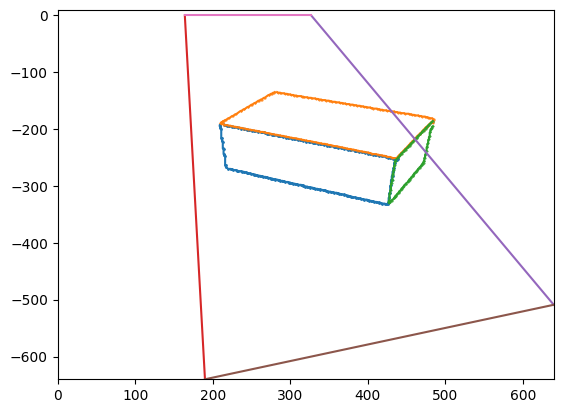

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.xlim([0, 640])
plt.ylim([-640, 10])#-640, 0  , 10потому что не видно врезнюю границу

# точки граней
ax.scatter(x1,y1,s = 1)
ax.scatter(x2,y2,s = 0.2)
ax.scatter(x3,y3,s = 0.2)

# контуры граней
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

# границы ленты
# print(arr_lenta_left[:,:])
# print(arr_lenta_right[:,:])
# 164 0, 327, 0
#  640,509, 190,640
plt.plot(arr_lenta_left[:,0] , -arr_lenta_left[:,1])
plt.plot(arr_lenta_right[:,0] , -arr_lenta_right[:,1])
plt.plot(arr_lenta_down[:,0] , -arr_lenta_down[:,1])
plt.plot(arr_lenta_up[:,0] , -arr_lenta_up[:,1])

# рисуем паральные линии нижней границы в ограничениях:

# dx,dy = arr_lenta_down[0][0]-arr_lenta_down[0][1], arr_lenta_down[1][1]-arr_lenta_down[1][0]
# ulim_x_down = [arr_lenta_down[0][0]]
# ulim_y_down = []
# for i in range(1,25):
  # plt.plot(arr_lenta_down[:,0], -arr_lenta_down[:,1] + i*25,linewidth= 0.3)
  # plt.plot(arr_lenta_left[:,0] + i*25, -arr_lenta_left[:,1] ,linewidth= 0.3)
  # plt.plot(arr_lenta_right[:,0] - i*25, -arr_lenta_right[:,1] ,linewidth= 0.3)

# plt.plot(x1, y1 - 150)
plt.show()


### методом аппроксимации многоугольника с помощью прямых отрезков, например, методом Рамера-Дугласа-Пекера ТОП(Можно дропать маленькие участки и достаривать большие отрезки в зависимости от ситуации)

- Для упрощения многоугольника до четырехугольника с минимальными потерями информации можно воспользоваться методом аппроксимации многоугольника с помощью прямых отрезков, например, методом Рамера-Дугласа-Пекера (Ramer-Douglas-Peucker). Этот метод позволяет уменьшить количество вершин многоугольника, оставляя только самые значимые точки.

#### реализация

In [ ]:
!pip install shapely

In [ ]:
from shapely.geometry import Polygon, LinearRing, LineString
import matplotlib.pyplot as plt
 # находим четыре самых больших отрезка и ищем где они последовательное соединены мелочью, затем дропаем мелочь и ищем где пересекаются большие

def simplify_polygon(points, epsilon):
    """ Упрощение многоугольника с помощью метода Рамера-Дугласа-Пекера сводит к 4тырем сторонам"""
    # Упрощение линии с помощью метода Рамера-Дугласа-Пекера
    ring = LinearRing(points).simplify(epsilon)

    # Вершины упрощенного многоугольника -1 так как последняя координата повторяется
    xy = np.c_[np.array(ring.coords)]

    line_strings = drop_small_line(xy)
    line_strings = prolongation_segments(line_strings)
    line_strings = cut_at_intersection(line_strings)

    return line_strings


def drop_small_line(xy):
    """ Возвращает набор 4-рех ребер LineString (сведение до четырехугольника)"""
    #вынесем в отдельный список набор LineString
    xy_line_lenght = []
    for i in range(len(xy) - 1):
      line = LineString([xy[i], xy[i + 1]])
      xy_line_lenght.append([line.length, line])

    #найдем 4 самых больших ребра, дропнем мелочь
    while len(xy_line_lenght) != 4:
      xy_line_lenght.remove(min(xy_line_lenght))

    #пересоздадим массив без длинны ребер
    xy_line_lenght = np.array(xy_line_lenght)
    xy_line_lenght = xy_line_lenght[:,1]

    return xy_line_lenght

def prolongation_segments(line_strings):
    """ Возвращает масштабированный набор ребер в формате LineString"""
    #интреполируем отрезки с обоих сторон что бы потом обрезать в пересечениях условно на своюэе длинну
    for i in range(len(line_strings)):
      c = list(line_strings[i].coords)

      p1 = [c[0][0] * 2 - c[1][0], c[0][1] * 2 - c[1][1]]
      p2 = [c[1][0] * 2 - c[0][0], c[1][1] * 2 - c[0][1]]
      line_strings[i] = LineString([p1,p2])
      x_line, y_line = line_strings[i].xy
    return line_strings

def cut_at_intersection(line_strings):
    """ Обрезает прямые по ресечениям до четырехугольника"""
    l = []
    for i in range(len(line_strings)):
      if (i == len(line_strings) - 1):
        points = line_strings[i].intersection([line_strings[i - 1], line_strings[0]])
      else:
        points = line_strings[i].intersection([line_strings[i - 1], line_strings[i + 1]])
      l.append(LineString([points[0].coords[0], points[1].coords[0]]))

    return l

#### Пример

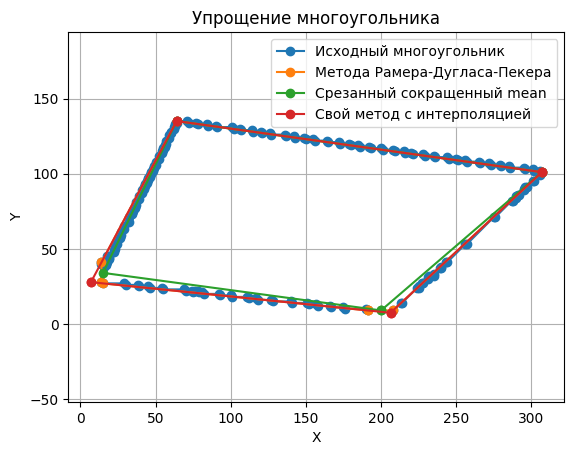

In [ ]:

from shapely.geometry import Polygon, LinearRing, LineString
import matplotlib.pyplot as plt

def simplify_polygon_test(points, epsilon):
    # Упрощение линии с помощью метода Рамера-Дугласа-Пекера
    ring = LinearRing(points).simplify(epsilon)
    polygon = Polygon(ring)
    return polygon

# Набор точек многоугольника
points = arr[1]


# Визуализация исходного и упрощенного многоугольников
x, y = zip(*points)
plt.plot(x, y, 'o-', label='Исходный многоугольник')

x, y = simplify_polygon_test(points, epsilon = 5).exterior.xy
plt.plot(x, y, 'o-', label='Метода Рамера-Дугласа-Пекера')

plt.plot([200,15,64,307,200], [9,34,135,101,9], 'o-', label='Срезанный сокращенный mean')

line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]

plt.plot(x_line, y_line,  'o-', label='Свой метод с интерполяцией')

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Упрощение многоугольника')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()


### Свои границы для основной модели

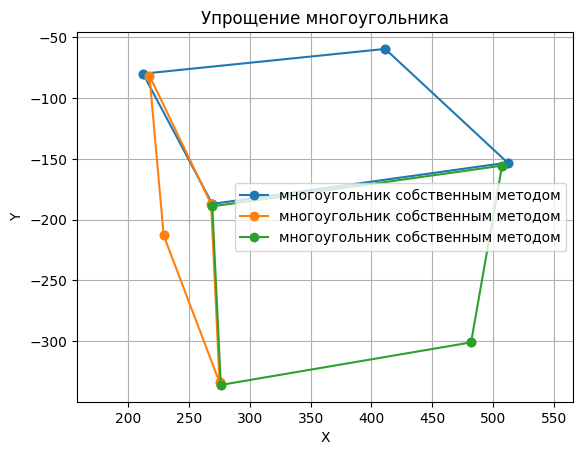

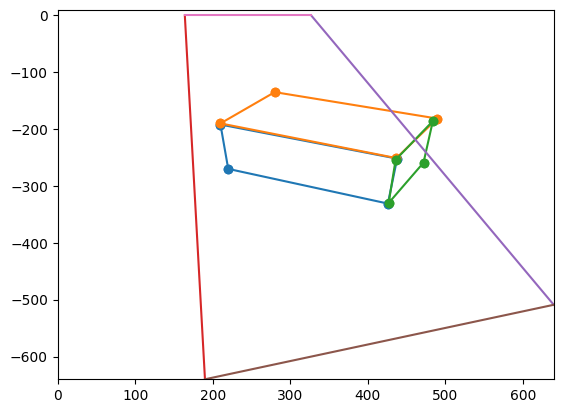

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.xlim([0, 640])
plt.ylim([-640, 10])#-640, 0  , 10потому что не видно врезнюю границу


points = np.c_[x1,y1]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

points = np.c_[x2,y2]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

points = np.c_[x3,y3]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

# # точки граней
# ax.scatter(x1,y1,s = 1)
# ax.scatter(x2,y2,s = 0.2)
# ax.scatter(x3,y3,s = 0.2)

# # контуры граней
# plt.plot(x1, y1)
# plt.plot(x2, y2)
# plt.plot(x3, y3)

# границы ленты
plt.plot(arr_lenta_left[:,0] , -arr_lenta_left[:,1])
plt.plot(arr_lenta_right[:,0] , -arr_lenta_right[:,1])
plt.plot(arr_lenta_down[:,0] , -arr_lenta_down[:,1])
plt.plot(arr_lenta_up[:,0] , -arr_lenta_up[:,1])

plt.show()


### Накладываем граффики на изображения

In [ ]:
!pip install pillow

[192.0, 270.0, 270.0, 331.0, 331.0, 252.0, 252.0, 192.0]


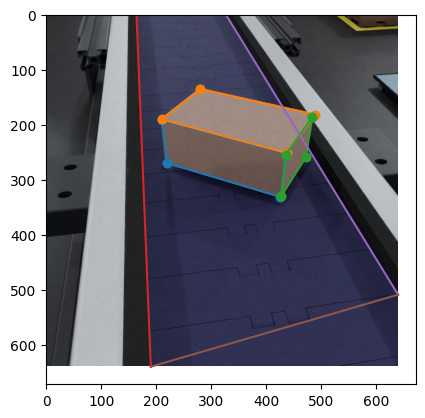

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Открываем изображение с помощью Pillow
image = Image.open(begin_img_path)
# Наложение графика на изображение
plt.imshow(image)


points = np.c_[x1,y1]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
y_line[:] = [-i for i in y_line]
print(y_line)
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

points = np.c_[x2,y2]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
y_line[:] = [-i for i in y_line]
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

points = np.c_[x3,y3]
line_strings = simplify_polygon(points, epsilon = 5)
x_line, y_line = [],[]
for l in line_strings:
  x_line += l.xy[0]
  y_line += l.xy[1]
y_line[:] = [-i for i in y_line]
plt.plot(x_line, y_line,  'o-', label='многоугольник собственным методом')

# # точки граней
# ax.scatter(x1,y1,s = 1)
# ax.scatter(x2,y2,s = 0.2)
# ax.scatter(x3,y3,s = 0.2)

# # контуры граней
# plt.plot(x1, y1)
# plt.plot(x2, y2)
# plt.plot(x3, y3)

# границы ленты
plt.plot(arr_lenta_left[:,0] , arr_lenta_left[:,1])
plt.plot(arr_lenta_right[:,0] , arr_lenta_right[:,1])
plt.plot(arr_lenta_down[:,0] , arr_lenta_down[:,1])
plt.plot(arr_lenta_up[:,0] , arr_lenta_up[:,1])

plt.show()


### Метод нахождения контура путем поиска выпуклойго многоугольника, количество точек умненьшеается в разы но есть нюансы, конкретные ребра проблематично находить

[215 166 164 162 161 153 143 133  89  87  86  85  83  67  66  64  20  10
   2   0 216]


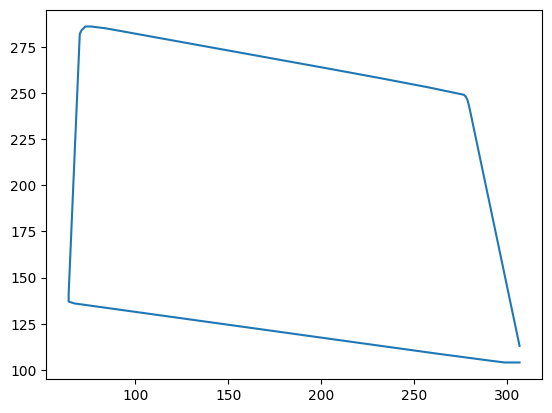

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# points = arr[1]
# points = arr[2]
points = arr[3]
# Построение выпуклой оболочки
hull = ConvexHull(points)

# contur1 = []
# contur2 = []
contur3 = []
print( hull.vertices)
for simplex in hull.vertices:
    contur3.append(np.array(points[simplex]))
    # contur3.append(np.array(points[simplex, 1]))

contur3 = np.array(contur3)
plt.plot(contur3[:, 0], contur3[:, 1])
plt.show()

### попытка найти грани кластеризацией (фейл)

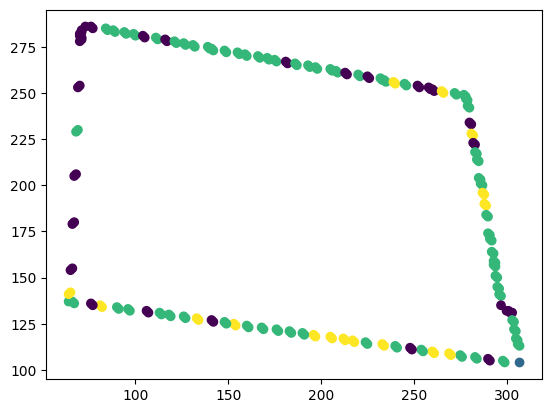

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Пример данных
X = arr[3]

# Применение DBSCAN
clustering = SpectralClustering(n_clusters=4).fit(X)

# Получение меток кластеров
labels = clustering.labels_

# Визуализация кластеров
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


## автоанатация

In [ ]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="/content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images",\
              det_model="/content/drive/MyDrive/yolov8l.pt 2.0 /runs4 best 0.751 /detect/train4/weights/best.pt", \
              sam_model='sam_l.pt',\
              output_dir='/content/drive/MyDrive/datasetsYolo8/SAM auto_annotate/valid/labels',\
              )


image 1/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/029f2c44f8b5a6cc-Copy_jpg.rf.a0dec7347d45424cbc72f3ae2322f7eb.jpg: 640x640 (no detections), 63.1ms
image 2/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/05a82b4668fcfbb8_jpg.rf.319399db5e5fd4efcd786e10cff3d6b7.jpg: 640x640 4 packages, 63.4ms
image 3/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/065465ff370a60b0_jpg.rf.0b71e5b4da9fddaa758d48d6a379ee46.jpg: 640x640 1 package, 30.1ms
image 4/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/0b1b4f0d929b4ec3_jpg.rf.d2809c7fad54e37b1361e7af515b600e.jpg: 640x640 1 package, 35.0ms
image 5/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/0c9c9ebe5c9aff0b_jpg.rf.c22861eda2dfdc63141dd6e0ef0f19f0.jpg: 640x640 1 package, 31.0ms
image 6/198 /content/drive/MyDrive/datasetsYolo8/Box_Detector.v1-1.yolov8/valid/images/0c9c9ebe5c9aff0b_jpg.rf.f

## Yolo WOrd

In [ ]:
from ultralytics import YOLOWorld

# Initialize a YOLO-World model
model = YOLOWorld('yolov8l-world.pt')  # or select yolov8m/l-world.pt for different sizes

# Execute inference with the YOLOv8s-world model on the specified image
results = model.predict('/content/untitled.png', save = True,conf= 0.1)



image 1/1 /content/untitled.png: 640x640 1 sink, 68.5ms
Speed: 2.0ms preprocess, 68.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


# шелуха

In [ ]:


# Load a model
model = YOLO('yolov8n-seg.pt')  # load an official model
# model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 476k/476k [00:00<00:00, 11.3MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 393.5ms
Speed: 19.2ms preprocess, 393.5ms inference, 51.7ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chai

In [ ]:
# Загрузите официальную или пользовательскую модель
# model = YOLO('yolov8n.pt')  # Загрузить официальную модель Detect
model = YOLO('yolov8n-seg.pt')  # Загрузить официальную модель Segment
# model = YOLO('yolov8n-pose.pt')  # Загрузить официальную модель Pose
# model = YOLO('path/to/best.pt')  # Загрузить пользовательскую обученную модель

# Выполнить отслеживание с помощью модели
results = model.track(source="/content/drive/MyDrive/video/1.mp4", save = True, show=True)
# results = model.track(source="/content/drive/MyDrive/video/2.mp4", save = True, show=True)
# results = model.track(source="/content/drive/MyDrive/video/3.mp4", save = True, show=True)
# results = model.track(source="/content/drive/MyDrive/video/4.mp4", save = True, show=True)
# results = model.track(source="/content/drive/MyDrive/video/5.mp4", save = True, show=True)
# results = model.track(source="https://youtu.be/LNwODJXcvt4", show=True, tracker="bytetrack.yaml")  # Отслеживание с трекером ByteTrack

100%|██████████| 6.73M/6.73M [00:00<00:00, 125MB/s]


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.8s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/6

In [ ]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]

    detections = sv.Detections.from_yolov8(results)

    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

    return frame

sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)

In [ ]:
sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)


In [ ]:
import supervision as sv
import numpy as np
from ultralytics import YOLO

VIDEO_PATH = "video.mp4"

model = YOLO("yolov8s.pt")

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)